<a href="https://colab.research.google.com/github/MasrukHabib/Psychological_Wellbeingness_Prediction_Using_ML_with_Hybrid_Hyparameter_Tuning_Techniques/blob/main/Psychological_Wellbeingness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --pre pycaret

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
# from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
# from sklearn.naive_bayes import GaussianNB

#Stacking
from mlxtend.classifier import StackingClassifier

## Reading the data

In [ ]:
import pandas as pd
df = pd.read_csv("/content/sample_data/survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## checking information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
# miss_values = ["nan","NaN","NA" ]
# df = pd.read_csv("/content/sample_data/survey.csv", na_values=miss_values)

### Checking miss value

In [ ]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

### Displaying all data

In [ ]:
df


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


## Droping comments,state,Timestamp columns

In [ ]:
df.drop(['comments'], axis= 1, inplace=True)
df.drop(['state'], axis= 1, inplace=True)
df.drop(['Timestamp'], axis= 1, inplace=True)


### Checking null values

In [ ]:
df.isnull().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

### Desplaying all Data

In [ ]:
df


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,NaN,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


## Calculate the variety of values in each column and percentage of each value in the dataset to sisplay the results

In [ ]:
import pandas as pd



# Calculate the variety of values in each column
variety = df.apply(lambda x: len(x.unique()))

# Calculate the percentage of each value in the dataset
total_values = df.count().sum()
percentage = variety.apply(lambda x: (x / total_values) * 100)

# Create a DataFrame to display the results
result_df = pd.DataFrame({'Variety': variety, 'Percentage': percentage})
print(result_df)


                           Variety  Percentage
Age                             53    0.177056
Gender                          49    0.163693
Country                         48    0.160353
self_employed                    3    0.010022
family_history                   2    0.006681
treatment                        2    0.006681
work_interfere                   5    0.016703
no_employees                     6    0.020044
remote_work                      2    0.006681
tech_company                     2    0.006681
benefits                         3    0.010022
care_options                     3    0.010022
wellness_program                 3    0.010022
seek_help                        3    0.010022
anonymity                        3    0.010022
leave                            5    0.016703
mental_health_consequence        3    0.010022
phys_health_consequence          3    0.010022
coworkers                        3    0.010022
supervisor                       3    0.010022
mental_health

In [ ]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in df:
    if feature in intFeatures:
        df[feature] = df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        df[feature] = df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        df[feature] = df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
df.head()


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [ ]:
#Clean 'Gender'
gender = df['Gender'].unique()
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [ ]:
#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in df.iterrows():

    if str.lower(col.Gender) in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)


In [ ]:
#Get rid of bullshit
stk_list = ['A little about you', 'p']
df = df[~df['Gender'].isin(stk_list)]

print(df['Gender'].unique())

['female' 'male' 'trans']


In [ ]:
#complete missing age with mean
df['Age'].fillna(df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(df['Age'])
s[s<18] = df['Age'].median()
df['Age'] = s
s = pd.Series(df['Age'])
s[s>120] = df['Age'].median()
df['Age'] = s

#Ranges of Age
df['age_range'] = pd.cut(df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)


In [ ]:
# # Assign default values for each data type

#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
df['self_employed'] = df['self_employed'].replace([defaultString], 'No')
print(df['self_employed'].unique())

['No' 'Yes']


In [ ]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
# #Replace "NaN" string from defaultString

df['work_interfere'] = df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(df['work_interfere'].unique())



['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [ ]:
df.isnull().sum()


Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
age_range                    0
dtype: int64

Encoding Data

In [ ]:
#Encoding data
labelDict = {}
for feature in df:
    le = preprocessing.LabelEncoder()
    le.fit(df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df[feature] = le.transform(df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_emp

In [ ]:

#Get rid of 'Country'
train_df = df.drop(['Country'], axis= 1)
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


Testing there aren't any missing data

In [ ]:

#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)


                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0
treatment                      0      0.0
family_history                 0      0.0
self_employed                  0  

Features Scaling: We're going to scale age, because it is extremely different from the other ones.

**Covariance Matrix. Variability comparison between categories of variables**

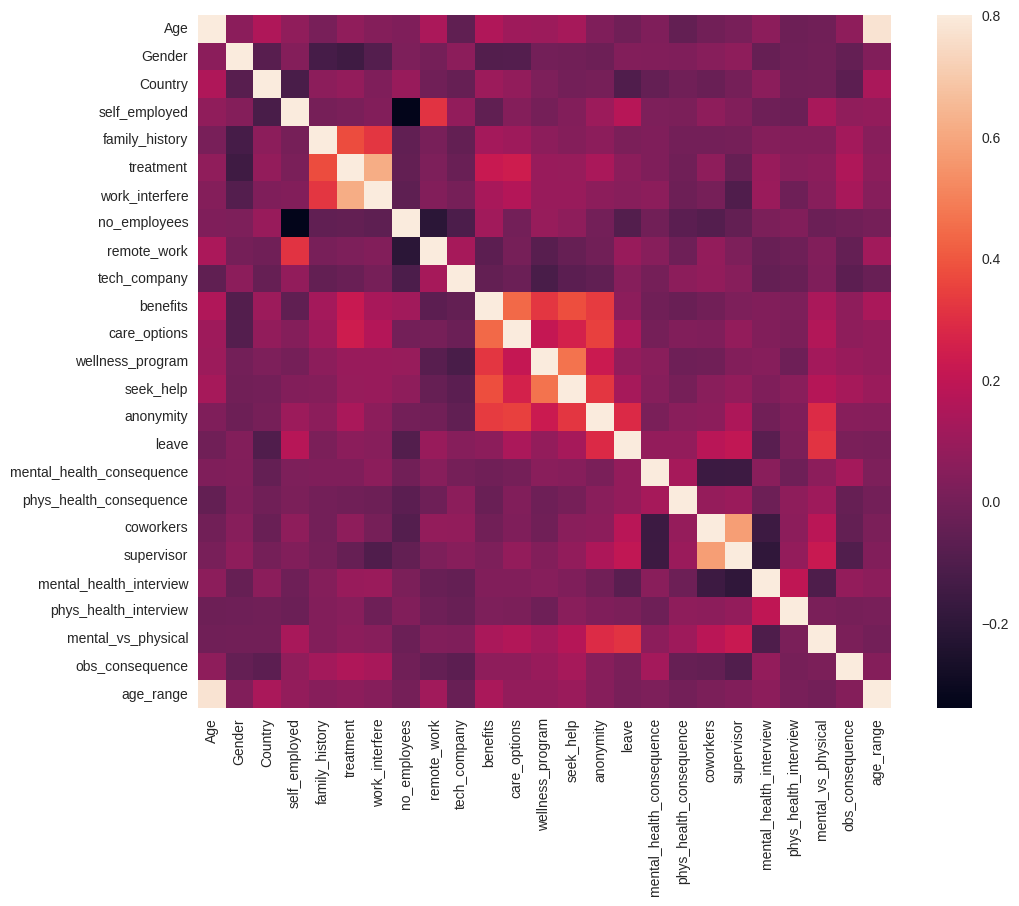

In [ ]:

# Correlation matrix
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

### treatment correlation matrix

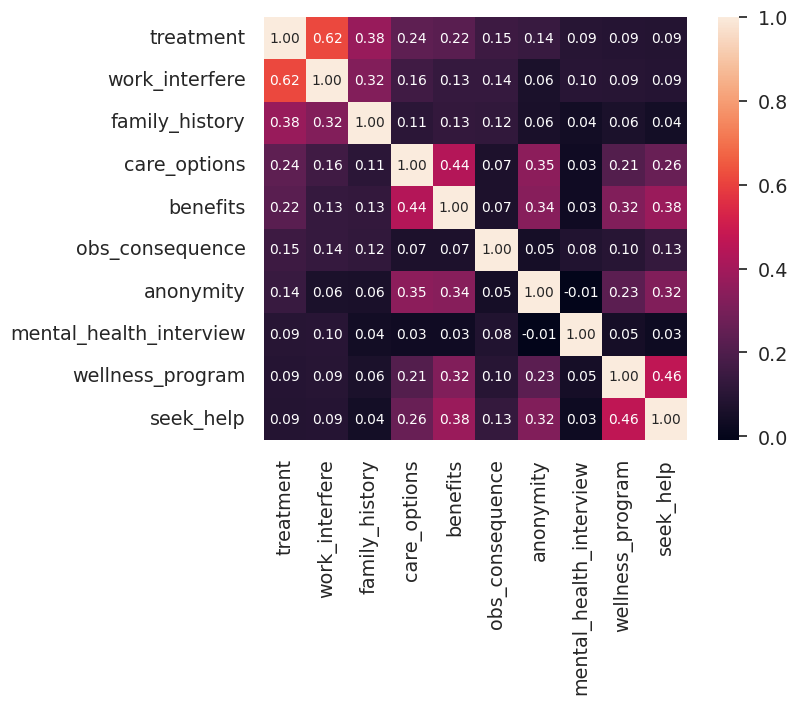

In [ ]:
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


**Some charts to see data relationship**

Distribution and density by Age

Text(0.5, 0, 'Age')

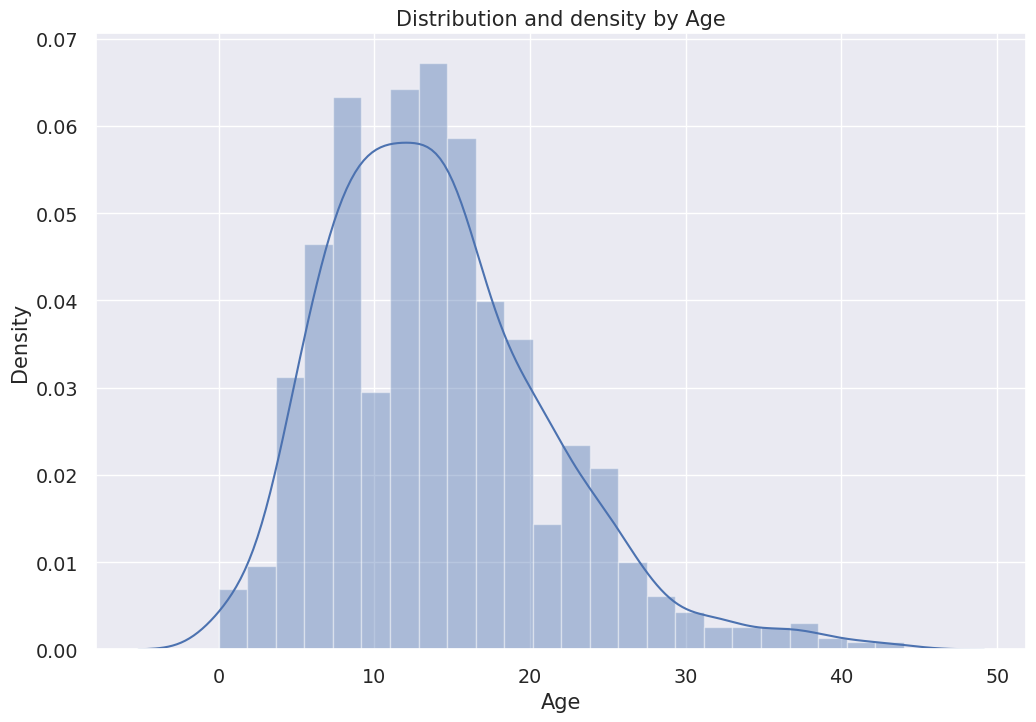

In [ ]:
# Distribution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(df["Age"], bins=24)
plt.title("Distribution and density by Age")
plt.xlabel("Age")

**Separate by treatment**

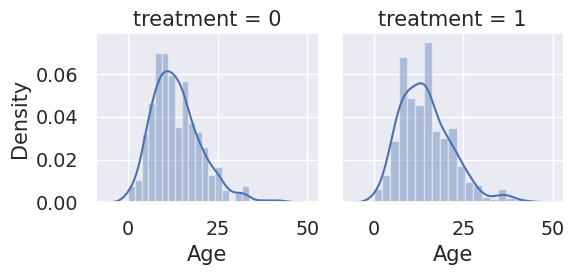

In [ ]:
g = sns.FacetGrid(df, col='treatment')

# Map the `sns.distplot` function to the "Age" column
g = g.map(sns.distplot, "Age")

How many people has been treated?

Text(0.5, 1.0, 'Total Distribution by treated or not')

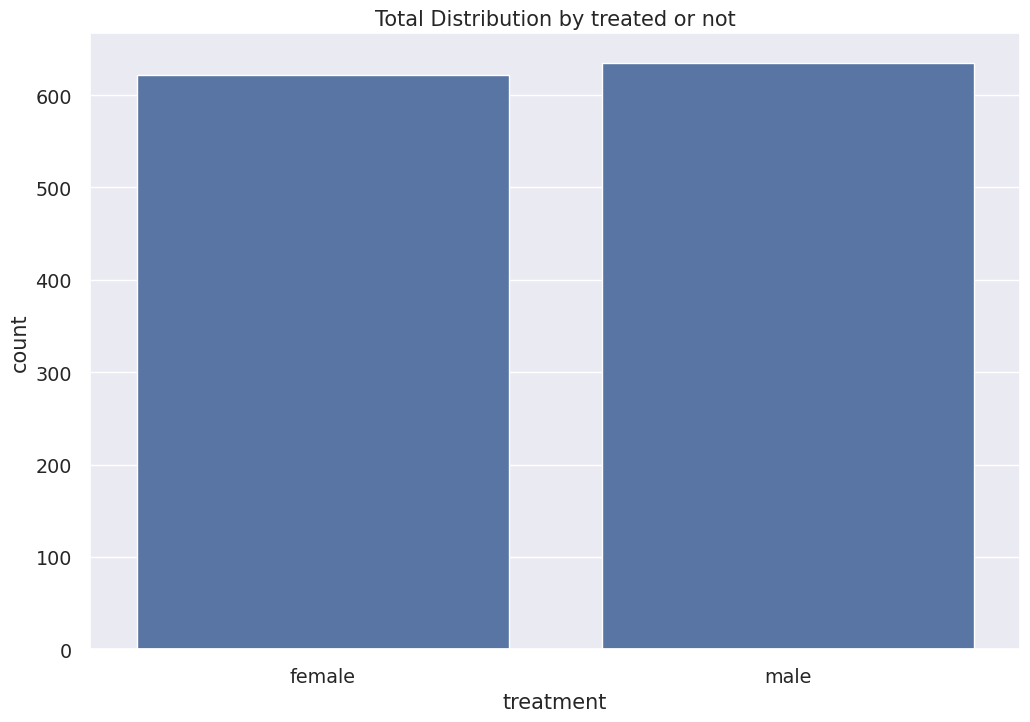

In [ ]:

plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", data=df)
g.set_xticklabels(labels)

plt.title('Total Distribution by treated or not')

Nested barplot to show probabilities for class and sex

In [ ]:
!pip install factor_analyzer

*Nested barplot to show probabilities for class and sex*

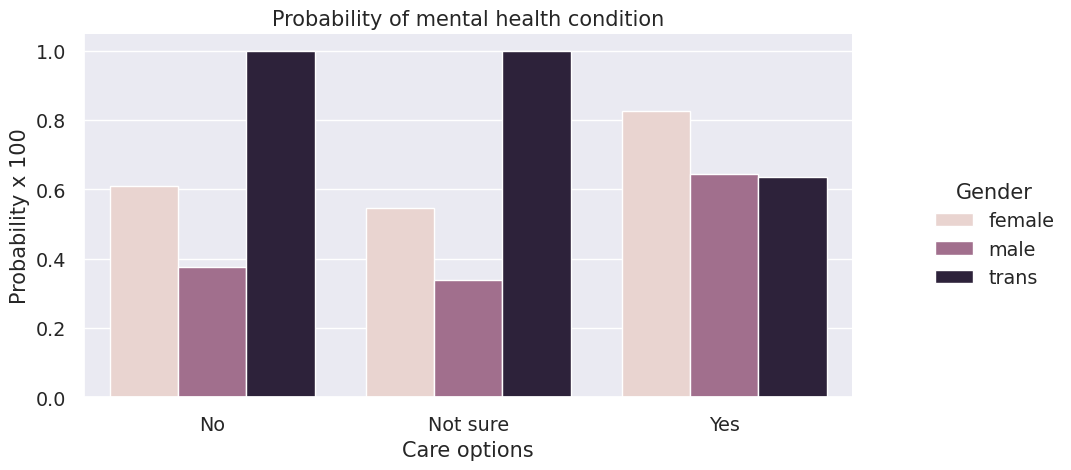

In [ ]:
o = labelDict['label_care_options']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=df, kind="bar", ci=None, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

Barplot to show probabilities for family history

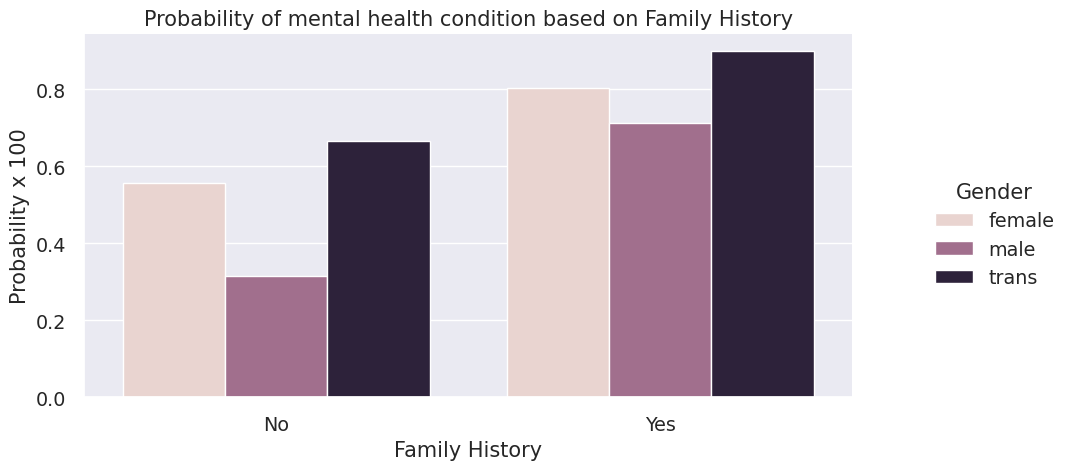

In [ ]:
o = labelDict['label_family_history']
g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=df, kind="bar", ci=None, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition based on Family History')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

Barplot to show probabilities for care options

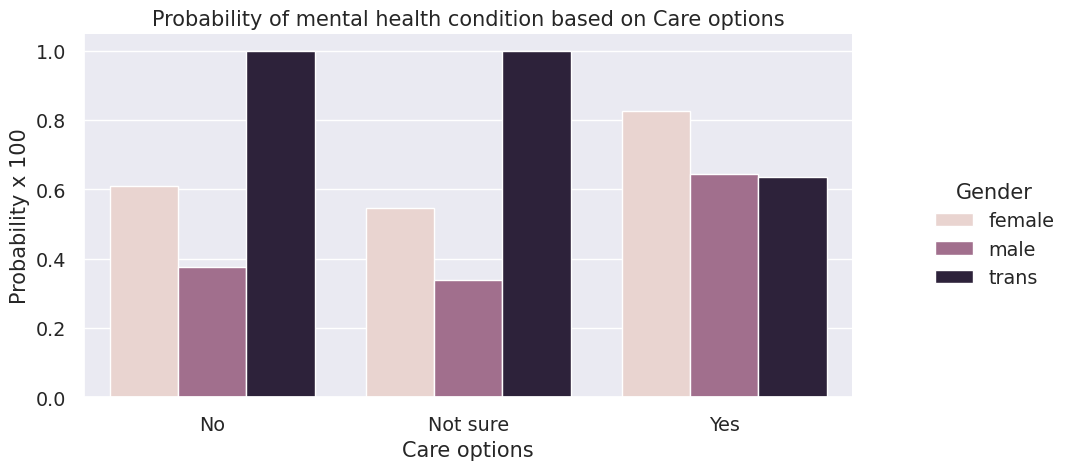

In [ ]:

o = labelDict['label_care_options']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=df, kind="bar", ci=None,  aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition based on Care options')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

Barplot to show probabilities for benefits

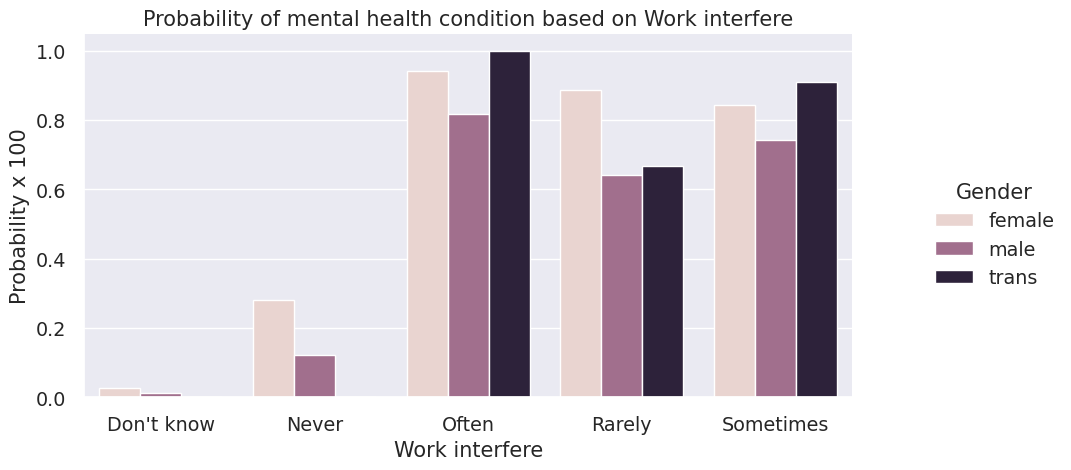

In [ ]:
import seaborn as sns
import factor_analyzer as factor
o = labelDict['label_work_interfere']
g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=df, kind="bar", ci=None, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition based on Work interfere')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

**Scaling and Fitting**

Features Scaling We're going to scale age, because is extremely different from the othere ones.

In [ ]:
# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(df[['Age']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


# ***## Spilitting Dataset***
## Creating new Colums name as a Claasses which is sum of (age,gender,family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere', 'treatment)

In [ ]:
import pandas as pd

# Assuming df is your DataFrame containing the columns 'Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere', 'treatment'

# Define the columns to sum
columns_to_sum = ['Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere', 'treatment']

# Create a new column 'classes' which is the sum of the selected columns
df['classes'] = df[columns_to_sum].sum(axis=1)

# Display the DataFrame with the new 'classes' column
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1257 non-null   int64
 1   Gender                     1257 non-null   int64
 2   Country                    1257 non-null   int64
 3   self_employed              1257 non-null   int64
 4   family_history             1257 non-null   int64
 5   treatment                  1257 non-null   int64
 6   work_interfere             1257 non-null   int64
 7   no_employees               1257 non-null   int64
 8   remote_work                1257 non-null   int64
 9   tech_company               1257 non-null   int64
 10  benefits                   1257 non-null   int64
 11  care_options               1257 non-null   int64
 12  wellness_program           1257 non-null   int64
 13  seek_help                  1257 non-null   int64
 14  anonymity                  12

### Checking data balance

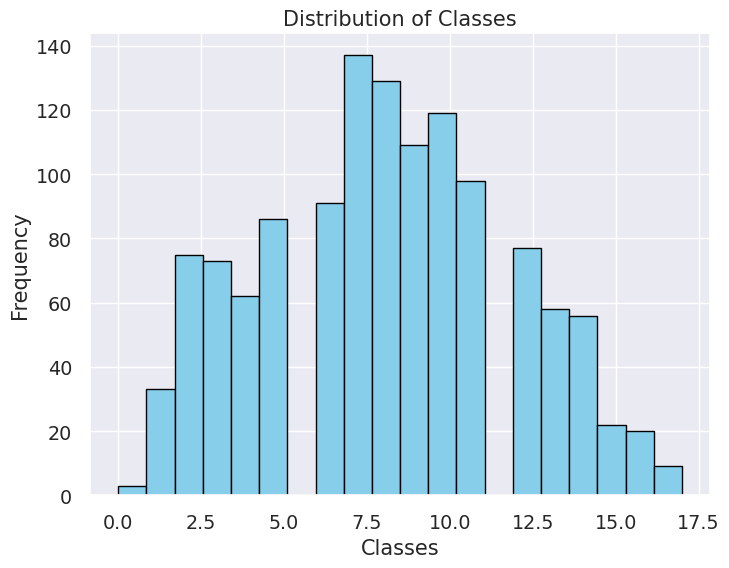

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'classes' column

# Plot a histogram of the 'classes' column
plt.figure(figsize=(8, 6))
plt.hist(df['classes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Classes')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Checking difference value in the column

In [ ]:
df['classes'].unique()

array([10,  4,  6,  9,  7, 14,  2,  3, 11,  5, 15, 13,  8, 16, 17, 12,  1,
        0])

### Define the condition and apply it to create a new column of classes 0 and 1 numbers

In [ ]:
import pandas as pd

# Assuming df is your DataFrame containing the column you want to modify

# Define the condition and apply it to create a new column
df['classes'] = df['classes'].apply(lambda x: 0 if x < 9 else 1)

# Display the DataFrame with the new column
print(df)


      Age  Gender  Country  self_employed  family_history  treatment  \
0      19       0       44              0               0          1   
1      26       1       44              0               0          0   
2      14       1        6              0               0          0   
3      13       1       43              0               1          1   
4      13       1       44              0               0          0   
...   ...     ...      ...            ...             ...        ...   
1254    8       1       43              0               0          1   
1255   14       1       44              0               1          1   
1256   16       1       44              0               1          1   
1257   28       0       44              0               0          0   
1258    7       1       44              0               1          1   

      work_interfere  no_employees  remote_work  tech_company  ...  \
0                  2             4            0             1  ..

### Now checking difference values in the column of classes

In [ ]:
df['classes'].unique()

array([1, 0])

### Calculate correlation matrix

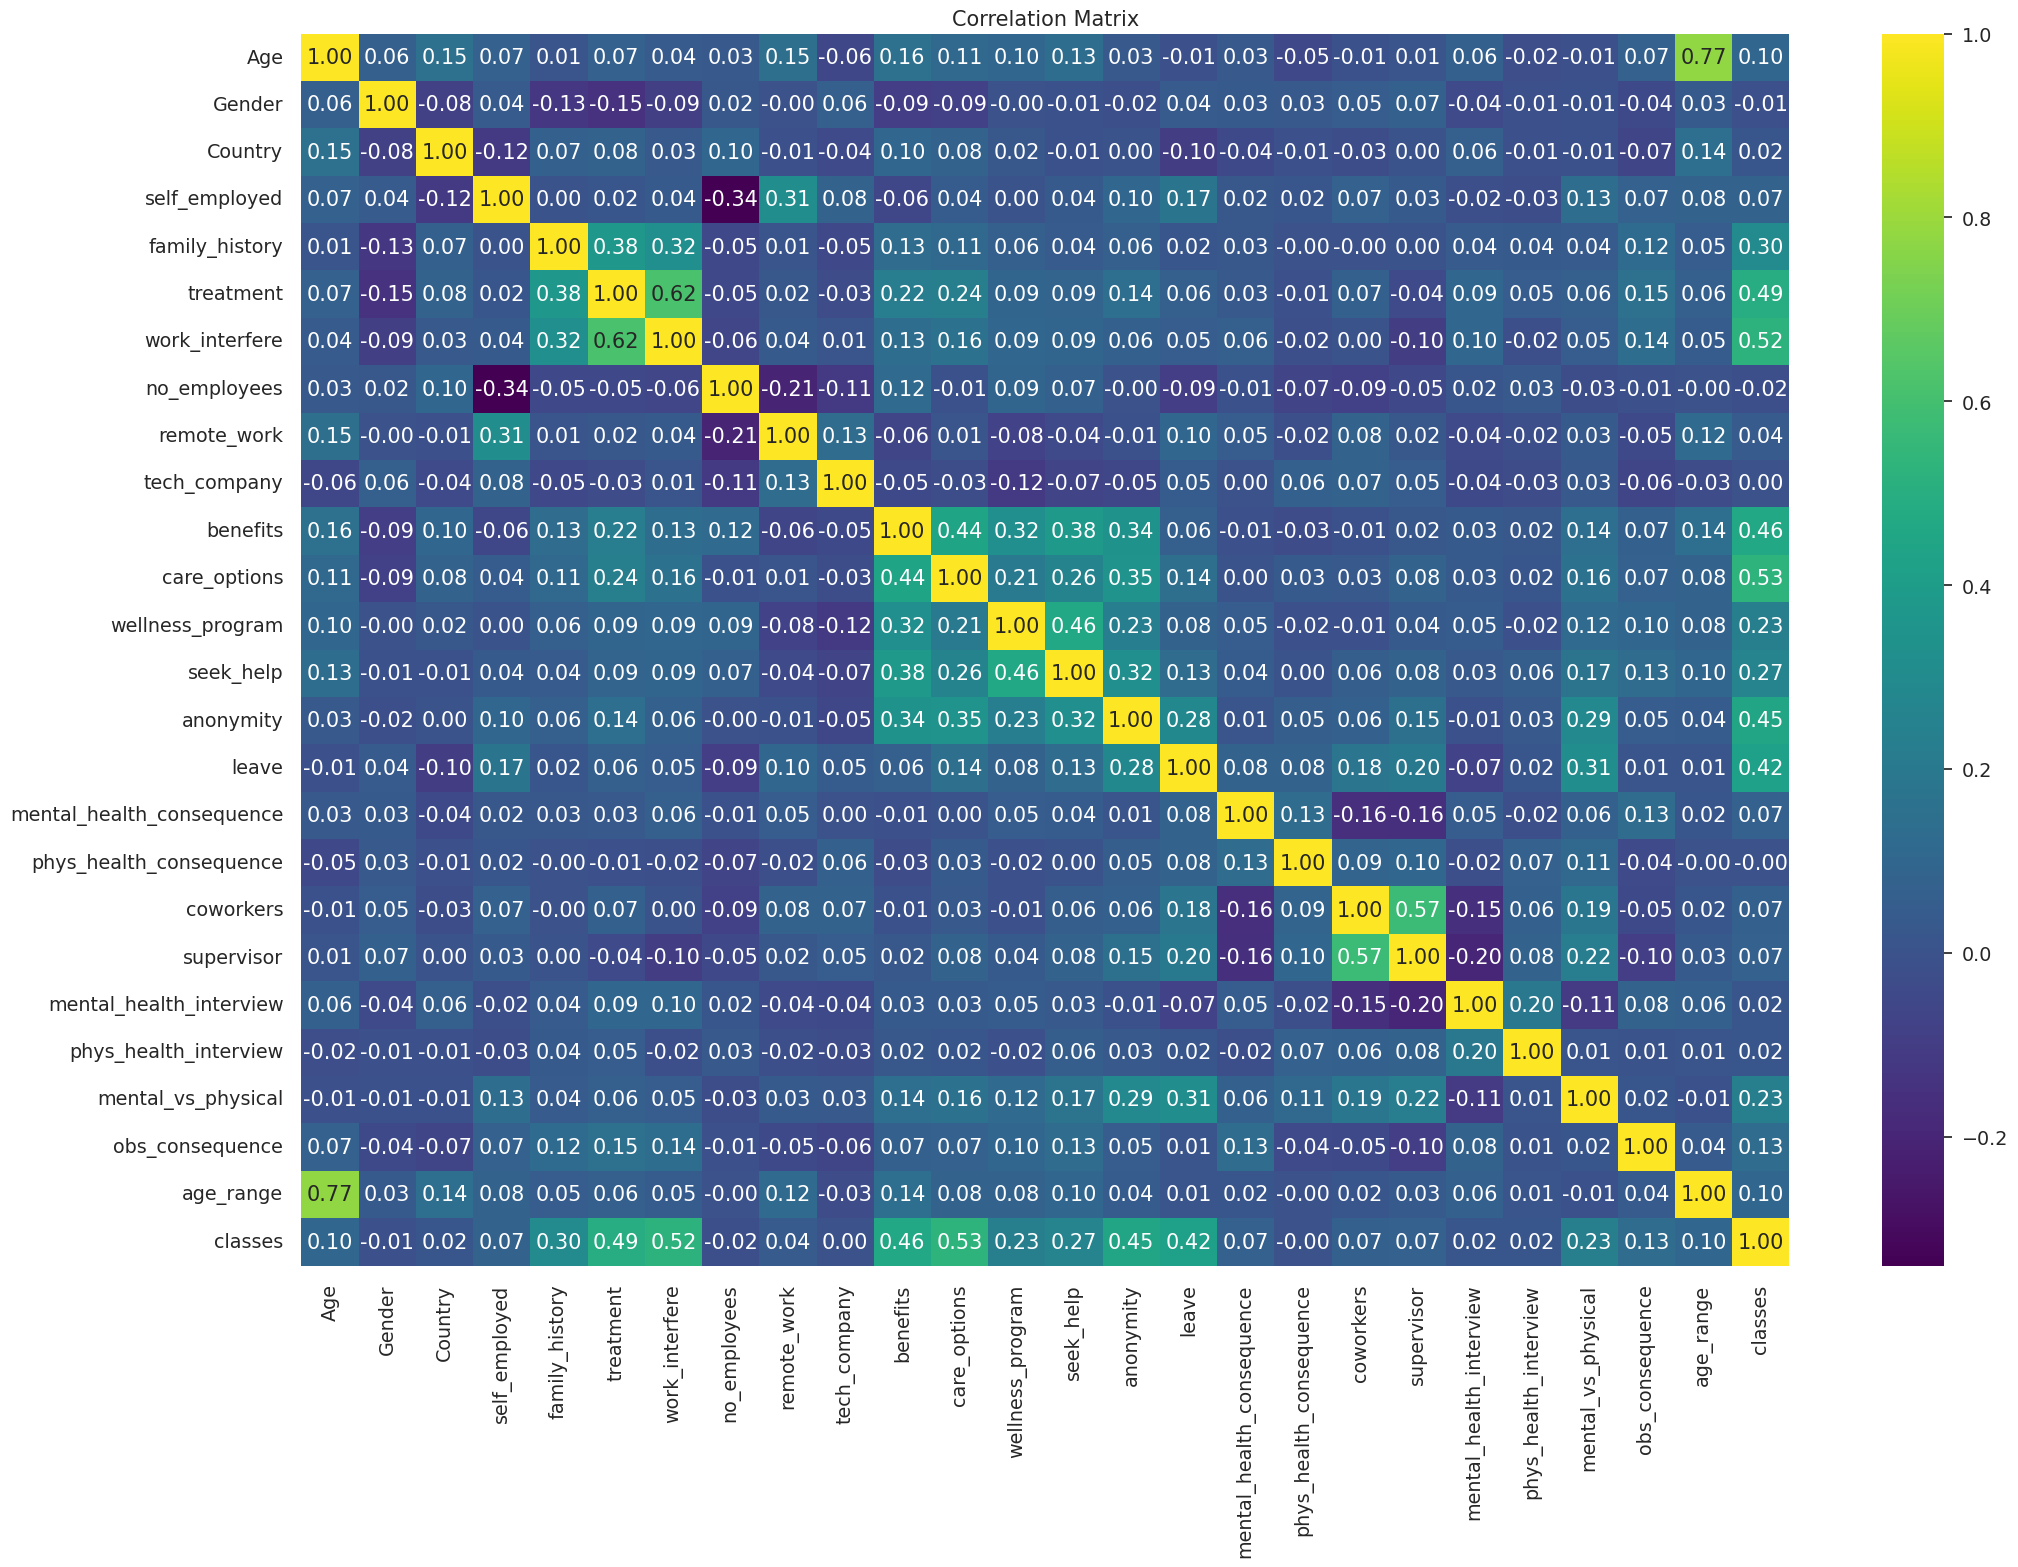

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with your data

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix as a heatmap with a colorful colormap
plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# import pandas as pd

# # Assuming you have a DataFrame named 'df' with your data

# # Calculate correlation matrix
# corr_matrix = df.corr().abs()

# # Exclude self-correlations and duplicate pairs
# upper_triangular = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# # Get the top 5 pairs with the highest correlation coefficients
# top_pairs = upper_triangular.unstack().sort_values(ascending=False)[:10]

# # Display the top 5 pairs with their correlation coefficients
# for pair, correlation in top_pairs.items():
#     feature1, feature2 = pair
#     print(f"{feature1} - {feature2}: {correlation:.4f}")


In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming you have a DataFrame named 'df' with your data

# # Calculate correlation matrix
# corr_matrix = df.corr()

# # Select the top 5 columns with the highest correlation coefficients
# top_columns = corr_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates().head(10).index
# top_columns = [(col[0], col[1]) for col in top_columns if col[0] != col[1]][:5]

# # Filter the correlation matrix to include only the top 5 columns
# corr_matrix_filtered = corr_matrix.loc[[col[0] for col in top_columns], [col[1] for col in top_columns]]

# # Plot correlation matrix of the top 5 columns as a heatmap with a colorful colormap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix_filtered, annot=True, cmap='viridis', fmt=".2f")
# plt.title('Correlation Matrix (Top 5 Columns)')
# plt.show()


### checking blance column of classes

Percentage Balance of Treatment Categories:


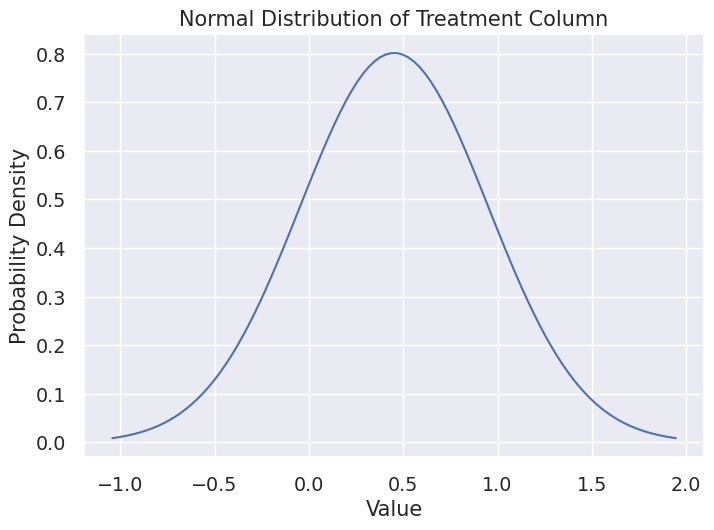

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming 'treatment_column' is the name of the column you want to check balance for
treatment_column = 'classes'

# Count occurrences of each unique value in the treatment column
treatment_counts = df[treatment_column].value_counts()

# # Plot the distribution of treatment categories
# plt.bar(treatment_counts.index, treatment_counts.values)
# plt.xlabel('Treatment Category')
# plt.ylabel('Count')
# plt.title('Balance of Treatment Categories')
# plt.show()

# Calculate the percentage of each category
total_samples = len(df)
percentage_balance = (treatment_counts / total_samples) * 100

print("Percentage Balance of Treatment Categories:")
# print(percentage_balance)

# Display normal distribution graph
mean = df[treatment_column].mean()
std_dev = df[treatment_column].std()

x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, norm.pdf(x, mean, std_dev))
plt.title('Normal Distribution of Treatment Column')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()


### Displaying 5 recoards

In [ ]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range,classes
0,19,0,44,0,0,1,2,4,0,1,...,1,1,1,2,1,0,2,0,2,1
1,26,1,44,0,0,0,3,5,0,0,...,0,1,0,0,1,1,0,0,2,0
2,14,1,6,0,0,0,3,4,0,1,...,1,1,2,2,2,2,1,0,2,0
3,13,1,43,0,1,1,2,2,0,1,...,2,2,1,0,0,0,1,1,2,1
4,13,1,44,0,0,0,1,1,1,1,...,1,1,1,2,2,2,0,0,2,0


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming you have feature columns and X_train as your training data
# feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']

# # Calculate mean and standard deviation for each feature
# means = X_train[feature_cols].mean()
# std_devs = X_train[feature_cols].std()

# # Create a range of values for the x-axis
# x = np.linspace(-3, 3, 1000)

# # Create subplots
# plt.figure(figsize=(10, 6))

# # Iterate over each feature and plot the normal distribution
# for col in feature_cols:
#     mean = means[col]
#     std_dev = std_devs[col]
#     pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
#     plt.plot(x, pdf, label=col)

# plt.title('Normal Distribution of Features')
# plt.xlabel('Standard Deviations from Mean')
# plt.ylabel('Probability Density')
# plt.legend()
# plt.grid(True)
# plt.show()


### Counting the values which is in the column of classes

In [ ]:
df['classes'].value_counts()

classes
0    689
1    568
Name: count, dtype: int64

### Assuming X contains features and y contains target labels as specified and prinding feature impotances


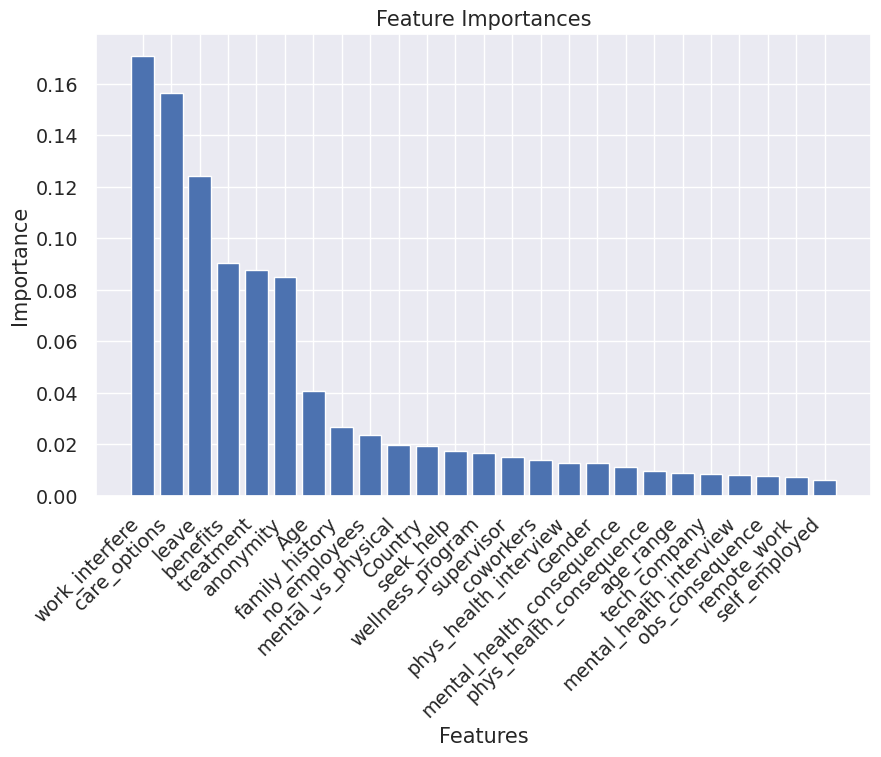

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming X contains features and y contains target labels as specified
X = df.drop(['classes'], axis=1)
y = df['classes']

# Initialize and train the RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X, y)

# Get feature importances
importances = rf_clf.feature_importances_

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = X.columns[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), sorted_importances, tick_label=sorted_features)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
from pycaret.classification import *
s = setup(df, target = 'classes')

,Description,Value
0,Session id,2321
1,Target,classes
2,Target type,Binary
3,Original data shape,"(1257, 26)"
4,Transformed data shape,"(1257, 26)"
5,Transformed train set shape,"(879, 26)"
6,Transformed test set shape,"(378, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9977,1.0000,0.9950,1.0000,0.9974,0.9954,0.9955,1.0570
ada,Ada Boost Classifier,0.9943,0.9998,0.9949,0.9928,0.9938,0.9885,0.9887,0.5770
ridge,Ridge Classifier,0.9716,0.9981,0.9647,0.9734,0.9686,0.9426,0.9434,0.0670
lda,Linear Discriminant Analysis,0.9716,0.9981,0.9647,0.9734,0.9686,0.9426,0.9434,0.0880
gbc,Gradient Boosting Classifier,0.9579,0.9941,0.9571,0.9511,0.9536,0.9151,0.9160,0.5230
xgboost,Extreme Gradient Boosting,0.9556,0.9947,0.9521,0.9510,0.9508,0.9104,0.9115,0.2520
lightgbm,Light Gradient Boosting Machine,0.9488,0.9931,0.9521,0.9362,0.9440,0.8969,0.8972,0.6510
et,Extra Trees Classifier,0.9420,0.9876,0.9297,0.9425,0.9351,0.8828,0.8841,0.6030
rf,Random Forest Classifier,0.9318,0.9853,0.9272,0.9227,0.9243,0.8622,0.8633,0.4830
qda,Quadratic Discriminant Analysis,0.9216,0.9700,0.9194,0.9093,0.9137,0.8418,0.8428,0.1970


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## Assuming X contains features and y contains target labels as specified

In [ ]:
# define X and y
# feature_cols = ['Age','family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
# X = df[feature_cols]
# y = df.treatment

X= df.drop(['classes'], axis= 1)
y = df['classes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # split X and y into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()


# AdaBoost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize AdaBoost classifier
adaboost_classifier = AdaBoostClassifier()

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)

# Predict using the AdaBoost classifier
y_pred_adaboost = adaboost_classifier.predict(X_test)

# Calculate accuracy
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Classifier Accuracy: {accuracy_adaboost}")

# Generate classification report
report_adaboost = classification_report(y_test, y_pred_adaboost, digits=3)
print(f"AdaBoost Classifier Classification Report:\n{report_adaboost}")


AdaBoost Classifier Accuracy: 0.9920634920634921
AdaBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0      0.993     0.993     0.993       141
           1      0.991     0.991     0.991       111

    accuracy                          0.992       252
   macro avg      0.992     0.992     0.992       252
weighted avg      0.992     0.992     0.992       252



# hyperparameters tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distributions for AdaBoost
param_dist_adaboost = {
    'n_estimators': [50, 100, 200],  # Number of weak learners
    'learning_rate': uniform(0.01, 1.0)  # Learning rate
}

# Initialize AdaBoost classifier
adaboost_classifier = AdaBoostClassifier()

# Initialize RandomizedSearchCV
random_search_adaboost = RandomizedSearchCV(estimator=adaboost_classifier, param_distributions=param_dist_adaboost,
                                            n_iter=10, cv=3, scoring='accuracy', random_state=42)

# Perform randomized search to find the best hyperparameters
random_search_adaboost.fit(X_train, y_train)

# Get the best hyperparameters
best_params_adaboost = random_search_adaboost.best_params_
print("Best Hyperparameters for AdaBoost:", best_params_adaboost)

# Use the best estimator to make predictions
best_estimator_adaboost = random_search_adaboost.best_estimator_
y_pred_adaboost_tuned = best_estimator_adaboost.predict(X_test)

# Calculate accuracy
accuracy_adaboost_tuned = accuracy_score(y_test, y_pred_adaboost_tuned)
print(f"Tuned AdaBoost Classifier Accuracy: {accuracy_adaboost_tuned}")

# Generate classification report for tuned AdaBoost classifier
report_adaboost_tuned = classification_report(y_test, y_pred_adaboost_tuned, digits=3)
print(f"Tuned AdaBoost Classifier Classification Report:\n{report_adaboost_tuned}")


Best Hyperparameters for AdaBoost: {'learning_rate': 0.606850157946487, 'n_estimators': 100}
Tuned AdaBoost Classifier Accuracy: 0.996031746031746
Tuned AdaBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0      0.993     1.000     0.996       141
           1      1.000     0.991     0.995       111

    accuracy                          0.996       252
   macro avg      0.996     0.995     0.996       252
weighted avg      0.996     0.996     0.996       252



# logistic regression

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Creating and fitting the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting the target variable on the test set
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculating precision
precision = precision_score(y_test, y_pred)

# Calculating recall
recall = recall_score(y_test, y_pred)

# Calculating F1 score
f1 = f1_score(y_test, y_pred)

# Displaying the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
RandomForestClassifier()
# Predicting using testing data
y_pred = rf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.964     0.936     0.950       141
           1      0.922     0.955     0.938       111

    accuracy                          0.944       252
   macro avg      0.943     0.946     0.944       252
weighted avg      0.945     0.944     0.945       252



# Support Vector Machine classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize Support Vector Machine classifier
svm_classifier = SVC()

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict using the SVM classifier
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Classifier Accuracy: {accuracy_svm}")

# Generate classification report
report_svm = classification_report(y_test, y_pred_svm, digits=3)
print(f"SVM Classifier Classification Report:\n{report_svm}")


SVM Classifier Accuracy: 0.9325396825396826
SVM Classifier Classification Report:
              precision    recall  f1-score   support

           0      0.919     0.965     0.941       141
           1      0.952     0.892     0.921       111

    accuracy                          0.933       252
   macro avg      0.935     0.928     0.931       252
weighted avg      0.933     0.933     0.932       252



# GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize GradientBoostingClassifier
gradientboost_classifier = GradientBoostingClassifier()

# Train the GradientBoostingClassifier
gradientboost_classifier.fit(X_train, y_train)

# Predict using the GradientBoostingClassifier
y_pred_gradientboost = gradientboost_classifier.predict(X_test)

# Calculate accuracy
accuracy_gradientboost = accuracy_score(y_test, y_pred_gradientboost)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gradientboost}")

# Generate classification report
report_gradientboost = classification_report(y_test, y_pred_gradientboost, digits=3)
print(f"Gradient Boosting Classifier Classification Report:\n{report_gradientboost}")


Gradient Boosting Classifier Accuracy: 0.9642857142857143
Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0      0.978     0.957     0.968       141
           1      0.947     0.973     0.960       111

    accuracy                          0.964       252
   macro avg      0.963     0.965     0.964       252
weighted avg      0.965     0.964     0.964       252



# XGBoost classifier

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost classifier
xgboost_classifier = xgb.XGBClassifier()

# Train the XGBoost classifier
xgboost_classifier.fit(X_train, y_train)

# Predict using the XGBoost classifier
y_pred_xgboost = xgboost_classifier.predict(X_test)

# Calculate accuracy
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print(f"XGBoost Classifier Accuracy: {accuracy_xgboost}")

# Generate classification report
report_xgboost = classification_report(y_test, y_pred_xgboost, digits=3)
print(f"XGBoost Classifier Classification Report:\n{report_xgboost}")


XGBoost Classifier Accuracy: 0.9722222222222222
XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0      0.993     0.957     0.975       141
           1      0.948     0.991     0.969       111

    accuracy                          0.972       252
   macro avg      0.970     0.974     0.972       252
weighted avg      0.973     0.972     0.972       252



# LightGBM classifier

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize LightGBM classifier
lgb_classifier = lgb.LGBMClassifier()

# Train the LightGBM classifier
lgb_classifier.fit(X_train, y_train)

# Predict using the LightGBM classifier
y_pred_lgb = lgb_classifier.predict(X_test)

# Calculate accuracy
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Classifier Accuracy: {accuracy_lgb}")

# Generate classification report
report_lgb = classification_report(y_test, y_pred_lgb, digits=3)
print(f"LightGBM Classifier Classification Report:\n{report_lgb}")


[LightGBM] [Info] Number of positive: 457, number of negative: 548
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1005, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.454726 -> initscore=-0.181592
[LightGBM] [Info] Start training from score -0.181592
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Classifier Accuracy: 0.9642857142857143
LightGBM Classifier Classification Report:
              precision    recall  f1-score   support

 

# Hybrid model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Train AdaBoost classifier
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)

# Train Logistic Regression classifier
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions from AdaBoost and Logistic Regression models
y_pred_adaboost = adaboost_model.predict(X_test)
y_pred_logistic = logistic_model.predict(X_test)

# Combining predictions using a simple voting mechanism
y_pred_hybrid = []
for pred_ab, pred_lr in zip(y_pred_adaboost, y_pred_logistic):
    # If both classifiers predict the same class, use that
    if pred_ab == pred_lr:
        y_pred_hybrid.append(pred_ab)
    # If they predict different classes, use the class predicted by AdaBoost
    else:
        y_pred_hybrid.append(pred_ab)

# Calculate evaluation metrics for the hybrid model
accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)
precision_hybrid = precision_score(y_test, y_pred_hybrid, average='weighted')
recall_hybrid = recall_score(y_test, y_pred_hybrid, average='weighted')
f1_hybrid = f1_score(y_test, y_pred_hybrid, average='weighted')

# Displaying evaluation metrics for the hybrid model
print("Evaluation metrics for Hybrid Model (AdaBoost + Logistic Regression):")
print("Accuracy:", accuracy_hybrid)
print("Precision:", precision_hybrid)
print("Recall:", recall_hybrid)
print("F1 Score:", f1_hybrid)


Evaluation metrics for Hybrid Model (AdaBoost + Logistic Regression):
Accuracy: 0.9920634920634921
Precision: 0.9920634920634921
Recall: 0.9920634920634921
F1 Score: 0.9920634920634921


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


# Initialize base classifiers
log_reg = LogisticRegression()
random_forest = RandomForestClassifier()
ada_boost = AdaBoostClassifier()
svm = SVC(probability=True)  # Set probability=True for SVC to enable soft voting
gradient_boosting = GradientBoostingClassifier()
xgb = XGBClassifier()

# Define the voting classifier with different combinations of algorithms
voting_clf_2 = VotingClassifier(estimators=[('log_reg', log_reg), ('random_forest', random_forest)], voting='soft')
voting_clf_3 = VotingClassifier(estimators=[('log_reg', log_reg), ('random_forest', random_forest), ('ada_boost', ada_boost)], voting='soft')
voting_clf_4 = VotingClassifier(estimators=[('log_reg', log_reg), ('random_forest', random_forest), ('ada_boost', ada_boost), ('svm', svm)], voting='soft')
voting_clf_5 = VotingClassifier(estimators=[('log_reg', log_reg), ('random_forest', random_forest), ('ada_boost', ada_boost), ('svm', svm), ('gradient_boosting', gradient_boosting)], voting='soft')
voting_clf_6 = VotingClassifier(estimators=[('log_reg', log_reg), ('random_forest', random_forest), ('ada_boost', ada_boost), ('svm', svm), ('gradient_boosting', gradient_boosting), ('xgb', xgb)], voting='soft')

# Fit each voting classifier
for clf in (voting_clf_2, voting_clf_3, voting_clf_4, voting_clf_5, voting_clf_6):
    clf.fit(X_train, y_train)

# Evaluate each voting classifier
for i, clf in enumerate((voting_clf_2, voting_clf_3, voting_clf_4, voting_clf_5, voting_clf_6), start=2):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Combination of {i} algorithms:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print()


Combination of 2 algorithms:
Accuracy: 0.9880952380952381
Precision: 0.9821428571428571
Recall: 0.990990990990991
F1 Score: 0.9865470852017937

Combination of 3 algorithms:
Accuracy: 0.9920634920634921
Precision: 0.990990990990991
Recall: 0.990990990990991
F1 Score: 0.990990990990991

Combination of 4 algorithms:
Accuracy: 0.9801587301587301
Precision: 0.9818181818181818
Recall: 0.972972972972973
F1 Score: 0.9773755656108597

Combination of 5 algorithms:
Accuracy: 0.9761904761904762
Precision: 0.9565217391304348
Recall: 0.990990990990991
F1 Score: 0.9734513274336283

Combination of 6 algorithms:
Accuracy: 0.9722222222222222
Precision: 0.9482758620689655
Recall: 0.990990990990991
F1 Score: 0.9691629955947136



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Initialize base classifiers
random_forest = RandomForestClassifier()
ada_boost = AdaBoostClassifier()
svm = SVC(probability=True)  # Set probability=True for SVC to enable soft voting
gradient_boosting = GradientBoostingClassifier()
xgb = XGBClassifier()

# Define the voting classifier with different combinations of algorithms
voting_clf_2 = VotingClassifier(estimators=[('random_forest', random_forest)], voting='soft')
voting_clf_3 = VotingClassifier(estimators=[('random_forest', random_forest), ('ada_boost', ada_boost)], voting='soft')
voting_clf_4 = VotingClassifier(estimators=[('random_forest', random_forest), ('ada_boost', ada_boost), ('svm', svm)], voting='soft')
voting_clf_5 = VotingClassifier(estimators=[('random_forest', random_forest), ('ada_boost', ada_boost), ('svm', svm), ('gradient_boosting', gradient_boosting)], voting='soft')
voting_clf_6 = VotingClassifier(estimators=[('random_forest', random_forest), ('ada_boost', ada_boost), ('svm', svm), ('gradient_boosting', gradient_boosting), ('xgb', xgb)], voting='soft')

# Fit each voting classifier
for clf in (voting_clf_2, voting_clf_3, voting_clf_4, voting_clf_5, voting_clf_6):
    clf.fit(X_train, y_train)

# Evaluate each voting classifier
for i, clf in enumerate((voting_clf_2, voting_clf_3, voting_clf_4, voting_clf_5, voting_clf_6), start=2):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Combination of {i} algorithms:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print()


Combination of 2 algorithms:
Accuracy: 0.9246031746031746
Precision: 0.9181818181818182
Recall: 0.9099099099099099
F1 Score: 0.9140271493212669

Combination of 3 algorithms:
Accuracy: 0.9404761904761905
Precision: 0.9137931034482759
Recall: 0.954954954954955
F1 Score: 0.933920704845815

Combination of 4 algorithms:
Accuracy: 0.9563492063492064
Precision: 0.9385964912280702
Recall: 0.963963963963964
F1 Score: 0.9511111111111111

Combination of 5 algorithms:
Accuracy: 0.9603174603174603
Precision: 0.9316239316239316
Recall: 0.9819819819819819
F1 Score: 0.956140350877193

Combination of 6 algorithms:
Accuracy: 0.9682539682539683
Precision: 0.9401709401709402
Recall: 0.990990990990991
F1 Score: 0.9649122807017544



# Displaying accuracy , precision ,recall , f1 score from  algorithm of "Adaboosting","Logistic Regression","Random Forest","SVM","Gradient Boosting","XGBoost","Lightgbm"

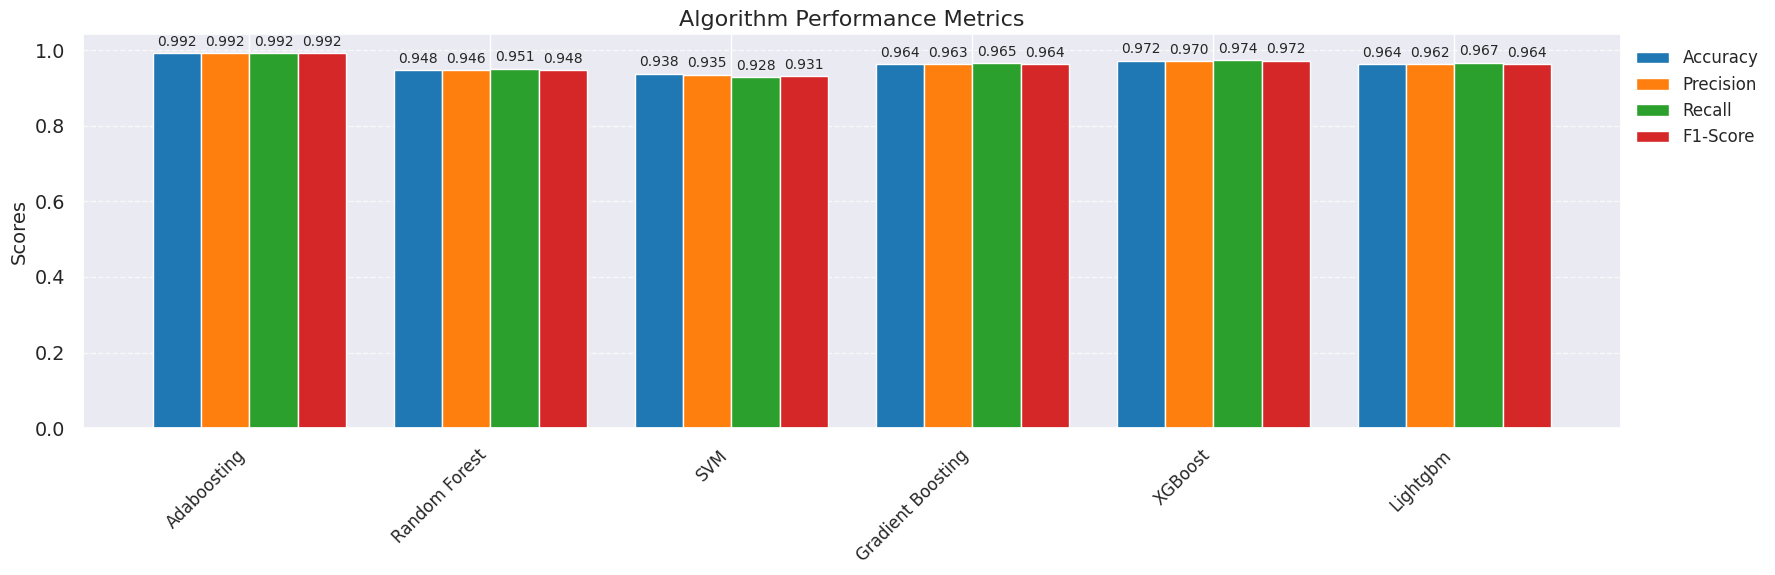

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define algorithms and their metrics
algorithms = [
    "Adaboosting",
    "Random Forest",
    "SVM",
    "Gradient Boosting",
    "XGBoost",
    "Lightgbm"
]

accuracy = [0.992,0.948, 0.938, 0.964, 0.972, 0.964]
precision =[0.992,0.946, 0.935, 0.963, 0.970, 0.962]
recall =   [0.992,0.951, 0.928, 0.965, 0.974, 0.967]
f1_score = [0.992,0.948, 0.931, 0.964, 0.972, 0.964]

# Plotting setup
x = np.arange(len(algorithms))
width = 0.2

fig, ax = plt.subplots(figsize=(18, 6))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Enhanced color palette

# Plotting each metric
bars1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy', color=colors[0])
bars2 = ax.bar(x - width/2, precision, width, label='Precision', color=colors[1])
bars3 = ax.bar(x + width/2, recall, width, label='Recall', color=colors[2])
bars4 = ax.bar(x + width*1.5, f1_score, width, label='F1-Score', color=colors[3])

# Add value labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

# Customizations
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Algorithm Performance Metrics', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(algorithms, rotation=45, ha='right', fontsize=12)
ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.tight_layout()

plt.show()


# Displaying only  accuracy  from  algorithm of "Adaboosting","Logistic Regression","Random Forest","SVM","Gradient Boosting","XGBoost","Lightgbm"

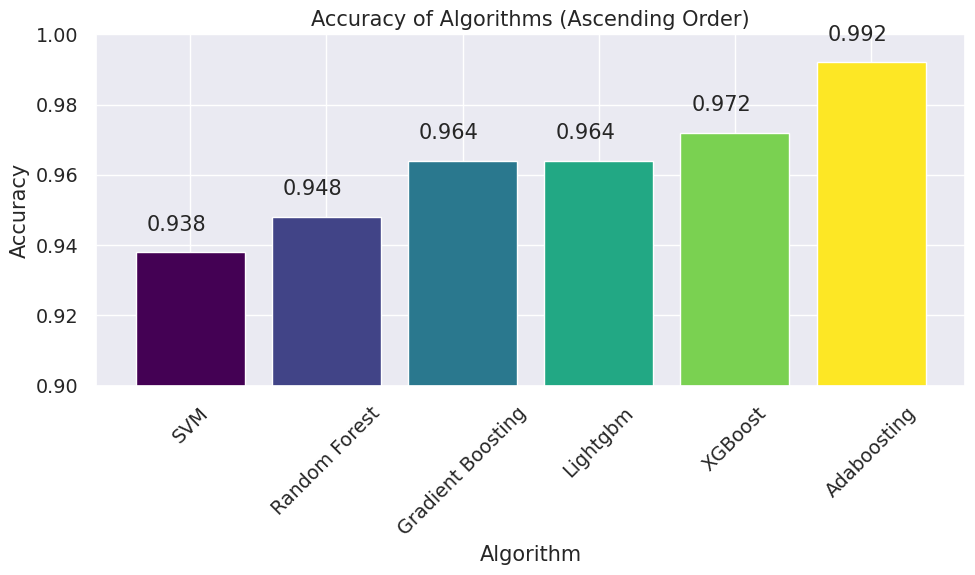

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define algorithms and their accuracies
algorithms = [
    "Adaboosting",
    "Random Forest",
    "SVM",
    "Gradient Boosting",
    "XGBoost",
    "Lightgbm"
]
accuracies = [
    0.992,  # Accuracy of Adaboosting
    0.948,  # Accuracy of Random Forest
    0.938,  # Accuracy of SVM
    0.964,  # Accuracy of Gradient Boosting
    0.972,  # Accuracy of XGBoost
    0.964   # Accuracy of Lightgbm
]

# Sort algorithms and accuracies based on accuracies
algorithms_sorted, accuracies_sorted = zip(*sorted(zip(algorithms, accuracies), key=lambda x: x[1]))

# Define colors for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(algorithms_sorted)))

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms_sorted, accuracies_sorted, color=colors)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Algorithms (Ascending Order)')

# Add text labels
for bar, accuracy in zip(bars, accuracies_sorted):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.005, f'{accuracy:.3f}', ha='center', va='bottom')

plt.ylim(0.9, 1)  # Set y-axis limit to range [0.9, 1] for better visualization of differences
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# Displaying accuracy , precision ,recall , f1 score from  hybrid model   of "LR+RF","LR+RF+AB","LR+RF+AB+SVM","LR+RF+AB+SVM+GB","LR+RF+AB+SVM+GB+XGB"

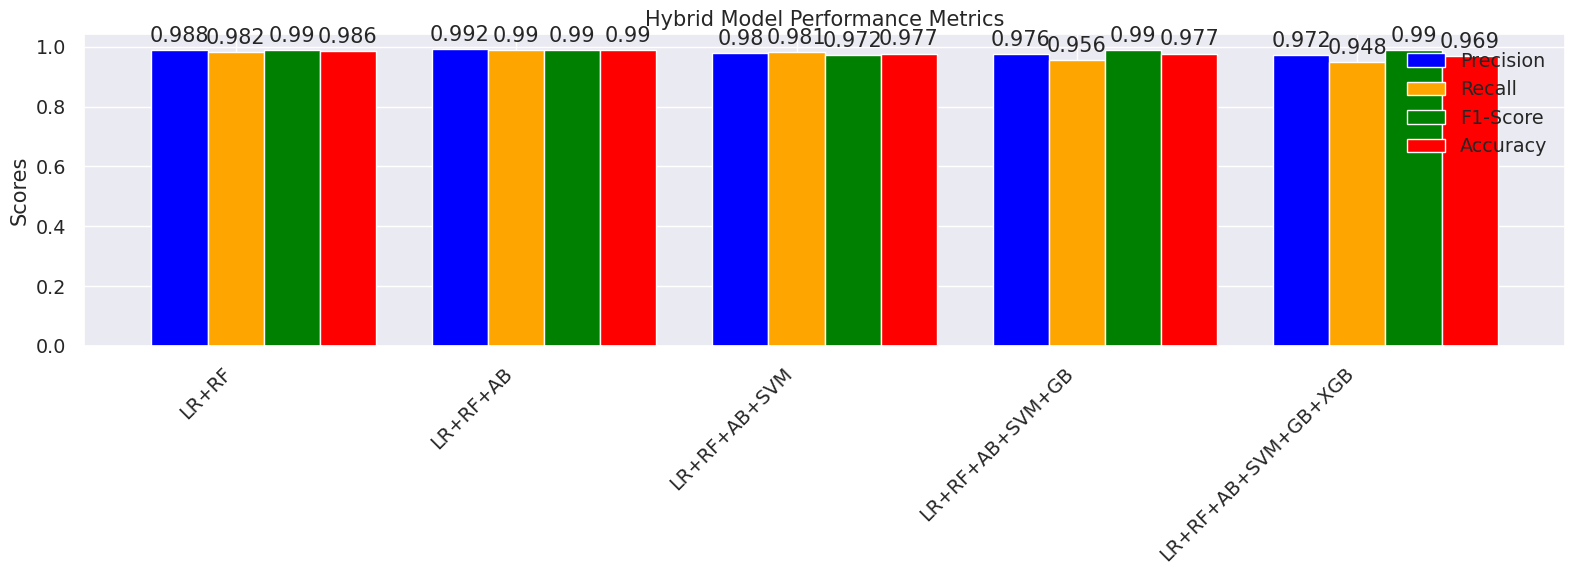

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define hybrid models and their metrics
hybrid_models = [
    "LR+RF",
    "LR+RF+AB",
    "LR+RF+AB+SVM",
    "LR+RF+AB+SVM+GB",
    "LR+RF+AB+SVM+GB+XGB"
]

precision =[0.988, 0.992, 0.980, 0.976, 0.972]
recall =   [0.982, 0.990, 0.981, 0.956, 0.948]
f1_score = [0.990, 0.990, 0.972, 0.990, 0.990]
accuracy = [0.986, 0.990, 0.977, 0.977, 0.969]

# Plotting
x = np.arange(len(hybrid_models))
width = 0.2

fig, ax = plt.subplots(figsize=(16, 6))

# Plotting precision
bars1 = ax.bar(x - width, precision, width, label='Precision', color='blue')
# Plotting recall
bars2 = ax.bar(x, recall, width, label='Recall', color='orange')
# Plotting f1-score
bars3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='green')
# Plotting accuracy
bars4 = ax.bar(x + 2 * width, accuracy, width, label='Accuracy', color='red')

# Add labels, title and legend
ax.set_ylabel('Scores')
ax.set_title('Hybrid Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(hybrid_models, rotation=45, ha='right')
ax.legend()

# Add value labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

fig.tight_layout()

plt.show()


# Displaying only accuracy  from hybrid model of "LR+RF","LR+RF+AB","LR+RF+AB+SVM","LR+RF+AB+SVM+GB","LR+RF+AB+SVM+GB+XGB"

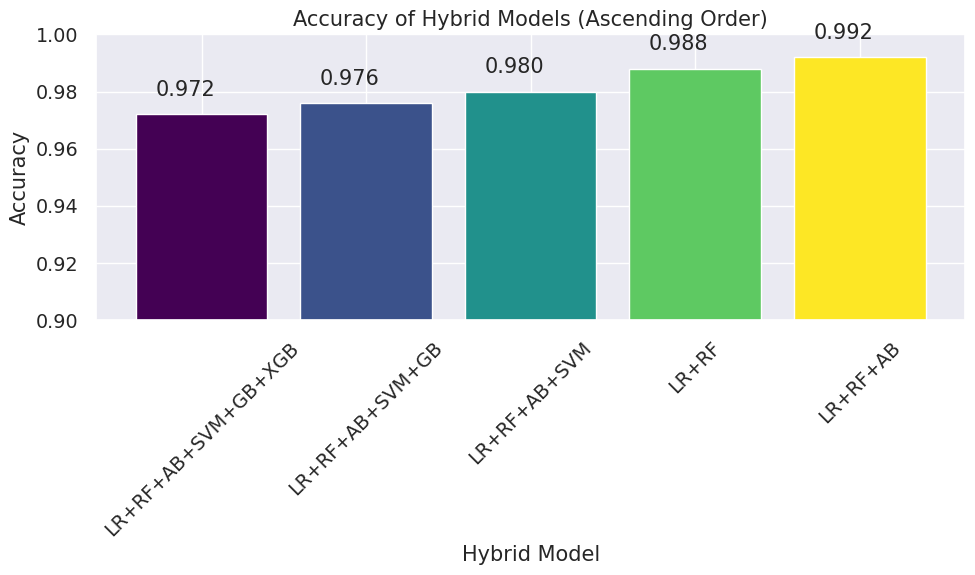

In [ ]:
import matplotlib.pyplot as plt

# Define hybrid models and their accuracies
hybrid_models = [
    "LR+RF",
    "LR+RF+AB",
    "LR+RF+AB+SVM",
    "LR+RF+AB+SVM+GB",
    "LR+RF+AB+SVM+GB+XGB"
]
accuracies = [0.988, 0.992, 0.980, 0.976, 0.972]

# Sort hybrid models and accuracies based on accuracies
hybrid_models_sorted, accuracies_sorted = zip(*sorted(zip(hybrid_models, accuracies), key=lambda x: x[1]))

# Define colors for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(hybrid_models_sorted)))

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(hybrid_models_sorted, accuracies_sorted, color=colors)
plt.xlabel('Hybrid Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Hybrid Models (Ascending Order)')

# Add text labels
for bar, accuracy in zip(bars, accuracies_sorted):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.005, f'{accuracy:.3f}', ha='center', va='bottom')

plt.ylim(0.9, 1)  # Set y-axis limit to range [0.9, 1] for better visualization of differences
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### Displaying accuracy with hyper parameter tuning  from hybrid model of LR+RF', 'LR+RF+AB', 'LR+RF+AB+SVM', 'LR+RF+AB+SVM+GB', 'LR+RF+AB+SVM+GB+XGB', 'Hyperparam Tuning (AB+RF)

<ipython-input-2-7ad9e1abe1bf>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_models, y=sorted_accuracies, palette=palette)


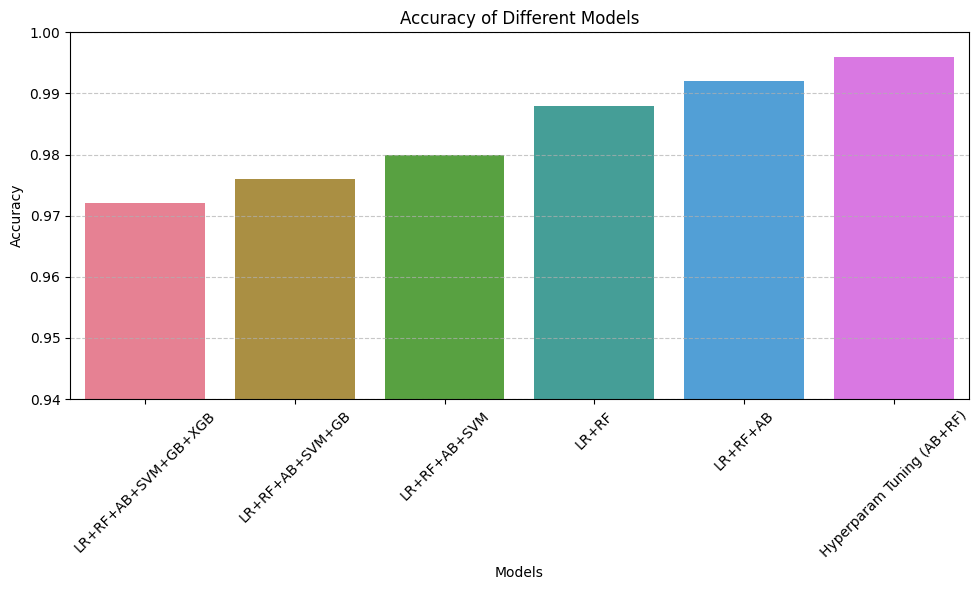

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data
models = ['LR+RF', 'LR+RF+AB', 'LR+RF+AB+SVM', 'LR+RF+AB+SVM+GB', 'LR+RF+AB+SVM+GB+XGB', 'Hyperparam Tuning (AB+RF)']
accuracies = [0.988, 0.992, 0.980, 0.976, 0.972,0.996]

# Sort the accuracies and corresponding models
sorted_data = sorted(zip(accuracies, models))

# Unzip the sorted data
sorted_accuracies, sorted_models = zip(*sorted_data)

# Create a color palette
palette = sns.color_palette("husl", len(models))

# Plot the accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_models, y=sorted_accuracies, palette=palette)
plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.94, 1.0)  # Adjust y-axis limits if necessary
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()
